In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
demo_24_q2 = pd.read_csv('Data/2024 Q2/DEMO24Q2.txt', sep='$')
demo_24_q2.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13880\1846893069.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_24_q2 = pd.read_csv('Data/2024 Q2/DEMO24Q2.txt', sep='$')


,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
0,100113073,10011307,3,F,20130215.0,20160224,20140314,20240625,EXP,NaN,...,A,F,Y,NaN,NaN,20240625,NaN,HP,CA,CA
1,1003229748,10032297,48,F,20150422.0,20240522,20140324,20240527,EXP,NaN,...,NaN,F,Y,NaN,NaN,20240527,NaN,HP,CA,CA
2,100373858,10037385,8,F,20120101.0,20240430,20140326,20240510,EXP,NaN,...,E,F,Y,64.3,KG,20240510,NaN,MD,GB,GB
3,100445153,10044515,3,F,NaN,20240429,20140328,20240515,EXP,NaN,...,NaN,F,Y,110.0,KG,20240515,NaN,HP,IT,IT
4,100789256,10078925,6,F,NaN,20240322,20140415,20240417,EXP,NaN,...,NaN,F,Y,NaN,NaN,20240409,NaN,HP,FR,FR


In [7]:
demo_24_q2['age_grp'].value_counts()

age_grp
A    62507
E    46770
C     4059
T     3981
I      734
N      557
Name: count, dtype: int64

In [3]:
#Selecting only the pediatric populations
age_groups = ['N', 'I', 'C', 'T']
pedi_demo_24_q2 = demo_24_q2[demo_24_q2['age_grp'].isin(age_groups)]
pedi_demo_24_q2

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
25,104022694,10402269,4,F,20140707.0,20150114,20140822,20240625,EXP,NaN,...,T,M,Y,68.1,KG,20240625,NaN,MD,DK,DK
26,104249728,10424972,8,F,20140523.0,20150814,20140902,20240625,EXP,NaN,...,T,F,Y,48.5,KG,20240625,NaN,MD,DE,DE
35,104636152,10463615,2,F,20030301.0,20240520,20140919,20240527,PER,NaN,...,C,M,Y,NaN,NaN,20240527,NaN,LW,US,US
59,105840089,10584008,9,F,20141029.0,20150216,20141114,20240625,EXP,NaN,...,C,F,Y,28.0,KG,20240625,NaN,MD,DE,DE
70,106337222,10633722,2,F,20000101.0,20240605,20141205,20240611,PER,NaN,...,T,M,Y,NaN,NaN,20240611,NaN,LW,US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397054,89324236,8932423,6,F,20121105.0,20141211,20121128,20240625,EXP,NaN,...,T,M,Y,51.5,KG,20240625,NaN,MD,GB,GB
397059,90278947,9027894,7,F,20121031.0,20141211,20130124,20240625,EXP,NaN,...,T,F,Y,37.8,KG,20240625,NaN,NaN,COUNTRY NOT SPECIFIED,DE
397064,91170904,9117090,4,F,20130201.0,20141211,20130225,20240625,EXP,NaN,...,T,M,Y,48.7,KG,20240625,NaN,HP,FR,FR
397092,96286135,9628613,5,F,20130715.0,20141210,20131017,20240625,EXP,NaN,...,T,M,Y,81.7,KG,20240625,NaN,MD,BE,BE


In [34]:
pedi_demo_24_q2.isna().sum()

primaryid              0
caseid                 0
caseversion            0
i_f_code               0
event_dt            5322
mfr_dt                 0
init_fda_dt            0
fda_dt                 0
rept_cod               0
auth_num            8938
mfr_num                1
mfr_sndr               0
lit_ref             7672
age                 2991
age_cod             2991
age_grp                0
sex                  850
e_sub                  0
wt                  7537
wt_cod              7537
rept_dt                0
to_mfr              9330
occp_cod              14
reporter_country       0
occr_country         179
dtype: int64

In [4]:
cols_to_drop = ['mfr_dt', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr', 'lit_ref', 'e_sub', 'rept_dt', 'to_mfr', 'occp_cod']
pedi_demo_24_q2 = pedi_demo_24_q2.drop(cols_to_drop, axis=1)
pedi_demo_24_q2

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,reporter_country,occr_country
25,104022694,10402269,4,F,20140707.0,20140822,20240625,15.0,YR,T,M,68.1,KG,DK,DK
26,104249728,10424972,8,F,20140523.0,20140902,20240625,15.0,YR,T,F,48.5,KG,DE,DE
35,104636152,10463615,2,F,20030301.0,20140919,20240527,8.0,YR,C,M,NaN,NaN,US,US
59,105840089,10584008,9,F,20141029.0,20141114,20240625,9.0,YR,C,F,28.0,KG,DE,DE
70,106337222,10633722,2,F,20000101.0,20141205,20240611,NaN,NaN,T,M,NaN,NaN,US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397054,89324236,8932423,6,F,20121105.0,20121128,20240625,16.0,YR,T,M,51.5,KG,GB,GB
397059,90278947,9027894,7,F,20121031.0,20130124,20240625,14.0,YR,T,F,37.8,KG,COUNTRY NOT SPECIFIED,DE
397064,91170904,9117090,4,F,20130201.0,20130225,20240625,15.0,YR,T,M,48.7,KG,FR,FR
397092,96286135,9628613,5,F,20130715.0,20131017,20240625,17.0,YR,T,M,81.7,KG,BE,BE


### Fixing the occurence country missing values

We can fill the occur_country values temporarily using "COUNTRY NOT SPECIFIED" value. Then check for corresponding records rows with both countries as "COUNTRY NOT SPECIFIED". Others, we can get the country of the reporter to be in the occr_country

In [5]:
pedi_demo_24_q2['occr_country'].fillna(value= 'COUNTRY NOT SPECIFIED', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16152\3233125676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pedi_demo_24_q2['occr_country'].fillna(value= 'COUNTRY NOT SPECIFIED', inplace=True)


In [6]:
pedi_demo_24_q2.isna().sum()

primaryid              0
caseid                 0
caseversion            0
i_f_code               0
event_dt            5322
init_fda_dt            0
fda_dt                 0
age                 2991
age_cod             2991
age_grp                0
sex                  850
wt                  7537
wt_cod              7537
reporter_country       0
occr_country           0
dtype: int64

In [7]:
def fix_country(df):
    if (df['reporter_country'] == 'COUNTRY NOT SPECIFIED') & (df['occr_country'] != 'COUNTRY NOT SPECIFIED'):
        return f'{df['occr_country']}'
    elif (df['reporter_country'] != 'COUNTRY NOT SPECIFIED') & (df['occr_country'] != 'COUNTRY NOT SPECIFIED'):
        return f'{df['occr_country']}'
    elif (df['reporter_country'] == 'COUNTRY NOT SPECIFIED') & (df['occr_country'] == 'COUNTRY NOT SPECIFIED'):
        return 'COUNTRY NOT SPECIFIED'
    elif (df['reporter_country'] != 'COUNTRY NOT SPECIFIED') & (df['occr_country'] == 'COUNTRY NOT SPECIFIED'):
        return f'{df['reporter_country']}'

In [8]:
pedi_demo_24_q2['origin_country'] = pedi_demo_24_q2.apply(fix_country, axis=1)
pedi_demo_24_q2

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,reporter_country,occr_country,origin_country
25,104022694,10402269,4,F,20140707.0,20140822,20240625,15.0,YR,T,M,68.1,KG,DK,DK,DK
26,104249728,10424972,8,F,20140523.0,20140902,20240625,15.0,YR,T,F,48.5,KG,DE,DE,DE
35,104636152,10463615,2,F,20030301.0,20140919,20240527,8.0,YR,C,M,NaN,NaN,US,US,US
59,105840089,10584008,9,F,20141029.0,20141114,20240625,9.0,YR,C,F,28.0,KG,DE,DE,DE
70,106337222,10633722,2,F,20000101.0,20141205,20240611,NaN,NaN,T,M,NaN,NaN,US,US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397054,89324236,8932423,6,F,20121105.0,20121128,20240625,16.0,YR,T,M,51.5,KG,GB,GB,GB
397059,90278947,9027894,7,F,20121031.0,20130124,20240625,14.0,YR,T,F,37.8,KG,COUNTRY NOT SPECIFIED,DE,DE
397064,91170904,9117090,4,F,20130201.0,20130225,20240625,15.0,YR,T,M,48.7,KG,FR,FR,FR
397092,96286135,9628613,5,F,20130715.0,20131017,20240625,17.0,YR,T,M,81.7,KG,BE,BE,BE


In [9]:
pedi_demo_24_q2[pedi_demo_24_q2['origin_country'] == 'COUNTRY NOT SPECIFIED']

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,reporter_country,occr_country,origin_country
118174,237263251,23726325,1,I,NaN,20240410,20240410,14.0,YR,T,F,NaN,NaN,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED
307950,239320221,23932022,1,I,NaN,20240603,20240603,2.0,YR,C,NaN,NaN,NaN,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED
338519,239658961,23965896,1,I,20210101.0,20240612,20240612,14.0,YR,T,M,NaN,NaN,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED
372847,240042081,24004208,1,I,NaN,20240624,20240624,16.0,YR,T,F,NaN,NaN,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED
373045,240044291,24004429,1,I,NaN,20240624,20240624,16.0,YR,T,F,NaN,NaN,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED,COUNTRY NOT SPECIFIED


In [10]:
#We can drop the occr_country & reporter_country now
pedi_demo_24_q2.drop(['reporter_country', 'occr_country'], axis = 1, inplace=True)
pedi_demo_24_q2.head()

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,origin_country
25,104022694,10402269,4,F,20140707.0,20140822,20240625,15.0,YR,T,M,68.1,KG,DK
26,104249728,10424972,8,F,20140523.0,20140902,20240625,15.0,YR,T,F,48.5,KG,DE
35,104636152,10463615,2,F,20030301.0,20140919,20240527,8.0,YR,C,M,NaN,NaN,US
59,105840089,10584008,9,F,20141029.0,20141114,20240625,9.0,YR,C,F,28.0,KG,DE
70,106337222,10633722,2,F,20000101.0,20141205,20240611,NaN,NaN,T,M,NaN,NaN,US


In [11]:
pedi_demo_24_q2.isna().sum()

primaryid            0
caseid               0
caseversion          0
i_f_code             0
event_dt          5322
init_fda_dt          0
fda_dt               0
age               2991
age_cod           2991
age_grp              0
sex                850
wt                7537
wt_cod            7537
origin_country       0
dtype: int64

In [49]:
len(missing_occrs)

8111

### Distributions of Ages, sex, weight in non-missing sets 

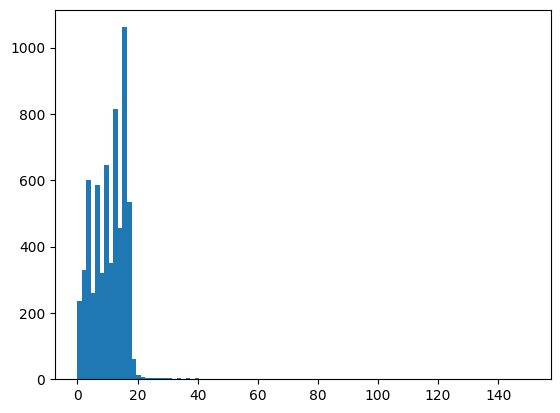

In [57]:
#Distribution of ages
non_missing_ages = pedi_demo_24_q2[pedi_demo_24_q2['age'].notna()]
plt.hist(non_missing_ages['age'],  bins= 100)
plt.show()

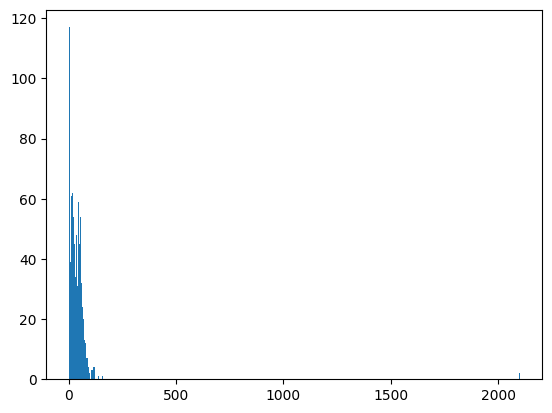

In [62]:
#Distribution of weights
no_weights = pedi_demo_24_q2[pedi_demo_24_q2['wt'].notna()]
plt.hist(no_weights['wt'], bins = 1000)
plt.show()

In [63]:
#Let's delete all the rows with more than 20% of missing values (More than 3 values missing)
pedi_demo_24_q2.isna().sum()

primaryid            0
caseid               0
caseversion          0
i_f_code             0
event_dt          5322
init_fda_dt          0
fda_dt               0
age               2991
age_cod           2991
age_grp              0
sex                850
wt                7537
wt_cod            7537
origin_country       0
dtype: int64

In [12]:
len(pedi_demo_24_q2)

9331

In [13]:
#Deleting every row with more than 3 missing values
pedi_new = pedi_demo_24_q2.dropna(thresh=0.8*len(pedi_demo_24_q2.columns), axis=0)
pedi_new

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,origin_country
25,104022694,10402269,4,F,20140707.0,20140822,20240625,15.0,YR,T,M,68.1,KG,DK
26,104249728,10424972,8,F,20140523.0,20140902,20240625,15.0,YR,T,F,48.5,KG,DE
35,104636152,10463615,2,F,20030301.0,20140919,20240527,8.0,YR,C,M,NaN,NaN,US
59,105840089,10584008,9,F,20141029.0,20141114,20240625,9.0,YR,C,F,28.0,KG,DE
110,109291023,10929102,3,F,20070409.0,20150319,20240512,5.0,YR,C,M,NaN,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397054,89324236,8932423,6,F,20121105.0,20121128,20240625,16.0,YR,T,M,51.5,KG,GB
397059,90278947,9027894,7,F,20121031.0,20130124,20240625,14.0,YR,T,F,37.8,KG,DE
397064,91170904,9117090,4,F,20130201.0,20130225,20240625,15.0,YR,T,M,48.7,KG,FR
397092,96286135,9628613,5,F,20130715.0,20131017,20240625,17.0,YR,T,M,81.7,KG,BE


In [14]:
pedi_new.isna().sum()

primaryid            0
caseid               0
caseversion          0
i_f_code             0
event_dt           400
init_fda_dt          0
fda_dt               0
age                 88
age_cod             88
age_grp              0
sex                 15
wt                2766
wt_cod            2766
origin_country       0
dtype: int64

In [15]:
#What if I drop all the missing rows
clean_df = pedi_demo_24_q2.dropna(thresh=0.9*len(pedi_demo_24_q2.columns), axis=0)
clean_df

,primaryid,caseid,caseversion,i_f_code,event_dt,init_fda_dt,fda_dt,age,age_cod,age_grp,sex,wt,wt_cod,origin_country
25,104022694,10402269,4,F,20140707.0,20140822,20240625,15.0,YR,T,M,68.1,KG,DK
26,104249728,10424972,8,F,20140523.0,20140902,20240625,15.0,YR,T,F,48.5,KG,DE
59,105840089,10584008,9,F,20141029.0,20141114,20240625,9.0,YR,C,F,28.0,KG,DE
150,112004763,11200476,3,F,20150511.0,20150618,20240625,17.0,YR,T,F,54.0,KG,GB
172,113919978,11391997,8,F,20150606.0,20150818,20240627,16.0,YR,T,M,64.3,KG,DK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397054,89324236,8932423,6,F,20121105.0,20121128,20240625,16.0,YR,T,M,51.5,KG,GB
397059,90278947,9027894,7,F,20121031.0,20130124,20240625,14.0,YR,T,F,37.8,KG,DE
397064,91170904,9117090,4,F,20130201.0,20130225,20240625,15.0,YR,T,M,48.7,KG,FR
397092,96286135,9628613,5,F,20130715.0,20131017,20240625,17.0,YR,T,M,81.7,KG,BE


In [16]:
round((clean_df.isna().sum()/len(clean_df))*100,2)

primaryid          0.00
caseid             0.00
caseversion        0.00
i_f_code           0.00
event_dt          31.97
init_fda_dt        0.00
fda_dt             0.00
age                0.00
age_cod            0.00
age_grp            0.00
sex                0.41
wt                 0.00
wt_cod             0.00
origin_country     0.00
dtype: float64

In [17]:
clean_df.columns

Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt',
       'init_fda_dt', 'fda_dt', 'age', 'age_cod', 'age_grp', 'sex', 'wt',
       'wt_cod', 'origin_country'],
      dtype='object')

In [4]:
pedi_demo_24_q2.isna().sum()

primaryid              0
caseid                 0
caseversion            0
i_f_code               0
event_dt            5322
mfr_dt                 0
init_fda_dt            0
fda_dt                 0
rept_cod               0
auth_num            8938
mfr_num                1
mfr_sndr               0
lit_ref             7672
age                 2991
age_cod             2991
age_grp                0
sex                  850
e_sub                  0
wt                  7537
wt_cod              7537
rept_dt                0
to_mfr              9330
occp_cod              14
reporter_country       0
occr_country         179
dtype: int64

In [5]:
#Extracting the primaryids of pediatric patients
ped_pids = list(pedi_demo_24_q2['primaryid'])

#Getting the drug dataset
df_drugs = pd.read_csv('Data/2024 Q2/DRUG24Q2.txt', sep='$')
ped_drug_sub = df_drugs[df_drugs['primaryid'].isin(ped_pids)]
ped_drug_sub.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13880\747753542.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_drugs = pd.read_csv('Data/2024 Q2/DRUG24Q2.txt', sep='$')


,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
437,104022694,10402269,1,PS,REMICADE,INFLIXIMAB,1,Intravenous drip,NaN,NaN,NaN,NaN,U,NaN,NaN,103772.0,NaN,NaN,Solution for infusion,NaN
438,104022694,10402269,2,SS,REMICADE,INFLIXIMAB,1,Intravenous drip,NaN,NaN,NaN,NaN,U,NaN,NaN,103772.0,300.0,MG,Solution for infusion,NaN
439,104022694,10402269,3,SS,REMICADE,INFLIXIMAB,1,Intravenous drip,NaN,NaN,NaN,NaN,U,NaN,NaN,103772.0,NaN,NaN,Solution for infusion,NaN
440,104022694,10402269,4,SS,REMICADE,INFLIXIMAB,1,Intravenous drip,NaN,NaN,NaN,NaN,U,NaN,NaN,103772.0,200.0,MG,Solution for infusion,NaN
441,104022694,10402269,5,SS,REMICADE,INFLIXIMAB,1,Intravenous drip,NaN,NaN,NaN,NaN,U,NaN,NaN,103772.0,200.0,MG,Solution for infusion,NaN


In [6]:
ped_drug_sub.isna().sum()

primaryid            0
caseid               0
drug_seq             0
role_cod             0
drugname             0
prod_ai            260
val_vbm              0
route             8118
dose_vbm          9258
cum_dose_chr     25078
cum_dose_unit    25078
dechal            9118
rechal           23238
lot_num          20419
exp_dt           25405
nda_num          11497
dose_amt         13787
dose_unit        13787
dose_form        10501
dose_freq        18403
dtype: int64

In [7]:
len(ped_drug_sub)

25405